In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from freq_pd import proc_freq

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
cdtypes = {'Item_Number':str,'Category':str}

In [6]:
# products_iowa = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\Iowa_Liquor_Products(1).csv',dtype=pdtypes)

In [7]:
df_categories_items =pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\categories_items.csv',dtype=cdtypes, index_col=0)

In [8]:
df_categories_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4472 entries, 0 to 4471
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Number        4472 non-null   object
 1   Item_Description   4472 non-null   object
 2   Category           4472 non-null   object
 3   Category_Name      4472 non-null   object
 4   New_Category_Name  4472 non-null   object
dtypes: object(5)
memory usage: 209.6+ KB


In [9]:
df_categories_items = df_categories_items.drop(columns=['Item_Description'])

In [10]:
dict_dtype = {'Item_Number':str,
'Bottle_Volume (ml)':int,
'Bottles_Sold':int,
'Bottle_Retail':float,
'Store_Number':int}

In [11]:
products = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\clustering_data_num_unique_stores.csv',dtype=dict_dtype, index_col=0)

In [12]:
products.rename({'Store_Number':'Num_Stores_Selling', 'Sales':'revenue'} ,axis=1, inplace=True)
              

In [13]:
products = products.drop(columns=['New_Category_Name'])

In [14]:
products = products.merge(df_categories_items,how='left',right_on='Item_Number', left_on='Item_Number')

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 0 to 4474
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4475 non-null   object 
 1   Item_Description    4475 non-null   object 
 2   Bottle_Volume       4475 non-null   int64  
 3   Bottle_Retail       4475 non-null   float64
 4   Bottles_Sold        4475 non-null   int32  
 5   Num_Stores_Selling  4475 non-null   int32  
 6   revenue             4475 non-null   float64
 7   Category            4475 non-null   object 
 8   Category_Name       4475 non-null   object 
 9   New_Category_Name   4475 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 349.6+ KB


In [16]:
check = products['revenue'].sum()
print(check)

424233229.6


In [17]:
products2 = products.copy()

In [18]:
#remove minis seliing for over $10 due to data quality issues see data quality check notebook
poor_quality = products2.loc[(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)]
poor_quality.shape

(159, 10)

In [19]:
poor_quality.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\poor_data_quality_items.csv')

In [20]:

(products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)

0       False
1       False
2       False
3       False
4       False
        ...  
4470    False
4471    False
4472    False
4473    False
4474    False
Length: 4475, dtype: bool

In [21]:
poor_quality_mask = (products.Bottle_Volume == 50) & (products.Bottle_Retail > 10)
type(poor_quality_mask)

pandas.core.series.Series

In [22]:
products2 = products2[~poor_quality_mask]

In [23]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4316 entries, 0 to 4474
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Item_Number         4316 non-null   object 
 1   Item_Description    4316 non-null   object 
 2   Bottle_Volume       4316 non-null   int64  
 3   Bottle_Retail       4316 non-null   float64
 4   Bottles_Sold        4316 non-null   int32  
 5   Num_Stores_Selling  4316 non-null   int32  
 6   revenue             4316 non-null   float64
 7   Category            4316 non-null   object 
 8   Category_Name       4316 non-null   object 
 9   New_Category_Name   4316 non-null   object 
dtypes: float64(2), int32(2), int64(1), object(5)
memory usage: 337.2+ KB


In [24]:
products.describe()

,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue
count,4475.000000,4475.000000,4.475000e+03,4475.000000,4.475000e+03
mean,792.361564,31.221806,6.930340e+03,125.248045,9.480072e+04
std,410.724957,69.350753,3.972229e+04,214.229508,3.889196e+05
min,20.000000,0.990000,1.000000e+00,1.000000,7.500000e+00
25%,750.000000,11.799501,5.250000e+01,3.000000,1.395540e+03
50%,750.000000,20.250000,5.470000e+02,49.000000,1.304100e+04
75%,750.000000,35.000000,3.622000e+03,154.000000,5.269973e+04
max,5250.000000,2963.694000,2.105088e+06,1725.000000,1.062280e+07


In [25]:
products.shape

(4475, 10)

<AxesSubplot:xlabel='Bottle_Retail', ylabel='Count'>

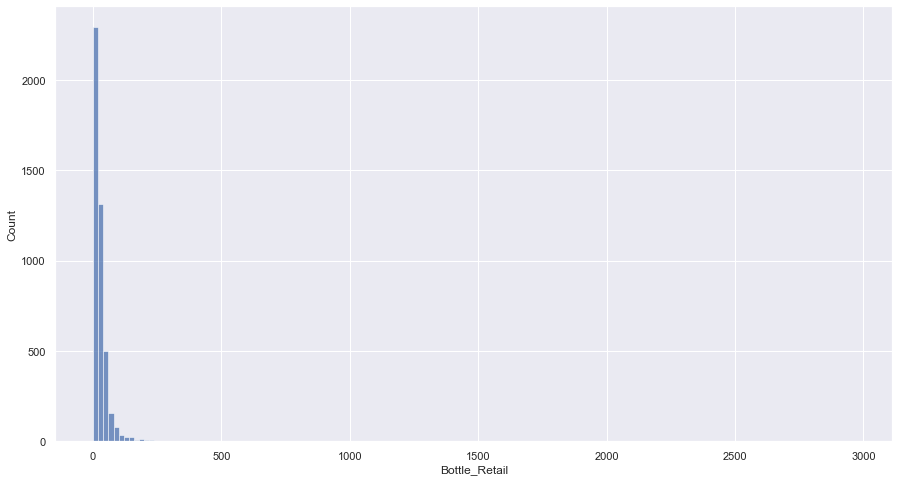

In [26]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(products['Bottle_Retail'], bins=150)


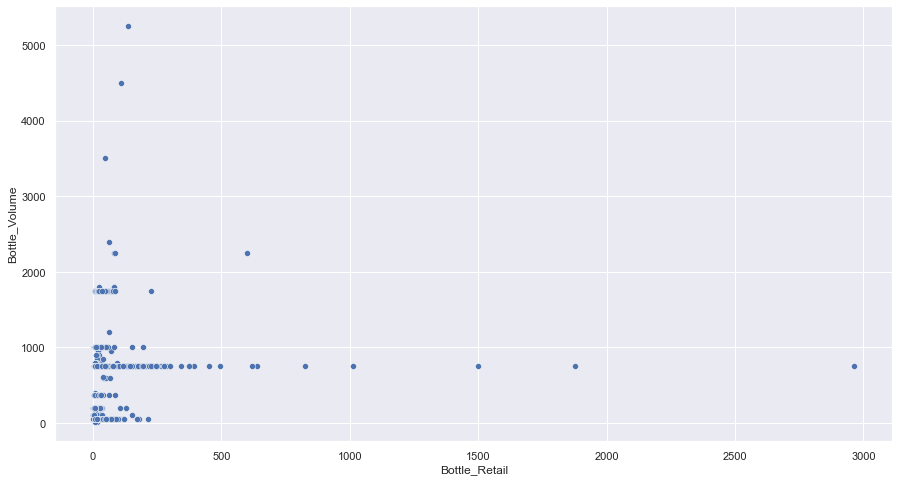

In [27]:
# products.plot.scatter(x='Bottle_Volume', y='Bottle_Retail')
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottle_Volume')
# gfg.set_ylim(0, 80)
# gph.set_xlim(0.98,3000)
# gph.set_xticks(range(0.98,3000))
plt.show()

In [28]:
products.Bottle_Retail.corr((products.Bottle_Volume))

0.012858551897243728

In [29]:
products.Bottle_Retail.corr((products.Bottles_Sold))

-0.04408941079679311

In [30]:
products.Bottles_Sold.corr((products.Bottle_Volume))

-0.000152168220141047

In [31]:
products.Bottles_Sold.corr((products.Num_Stores_Selling))

0.45378226327407434

In [32]:
# filt = products.Bottle_Retail > 1400
xfilt = products.Bottle_Retail > 500
products[xfilt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
1338,4113,Hennessy Paradis,750,824.990,27,15,22274.73,1052100,Imported Brandies,Brandies
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12,50977.11,1052100,Imported Brandies,Brandies
1919,6051,Glenmorangie Grand Vintage 1997 Limited Edition,750,637.410,8,4,5099.28,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
2914,901559,HA Blood Oath Trilogy II 3 Pack,2250,600.000,35,35,21000.00,1011200,Straight Bourbon Whiskies,Bourbon
3183,905953,Glenmorangie Grand Vintage 1996,750,618.740,2,2,1237.48,1012300,Single Malt Scotch,Scotch
3194,906532,Glengoyne 30 YO,750,1012.500,1,1,1012.50,1012200,Scotch Whiskies,Scotch
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2,3000.00,1011200,Straight Bourbon Whiskies,Bourbon
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10,18750.00,1011200,Straight Bourbon Whiskies,Bourbon


In [33]:
xfilt2 = products.Bottle_Volume > 3000
products[xfilt2]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
0,100015,Fireball Cinnamon Whiskey Bag in Box,3500,45.0,1123,129,50535.0,1081600,Whiskey Liqueur,Whiskey Liqueur
139,101515,Fireball Cinnamon Whiskey Keg,5250,138.0,180,141,24895.5,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
155,101665,Stumpys Spirits Cocktail Collection Gift Set,4500,108.0,115,26,12420.0,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages


In [34]:
np.sum(products.Bottles_Sold)

31013272

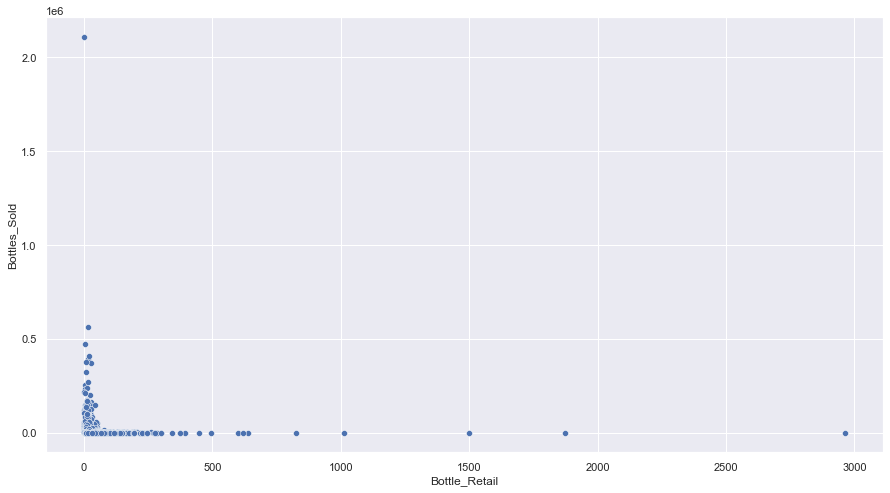

In [35]:
gph = sns.set(rc = {'figure.figsize':(15,8)})
gfg = sns.scatterplot(data=products, x='Bottle_Retail', y='Bottles_Sold')
# gfg.set_ylim(0, 80)

In [36]:
xfilt3= products.Item_Number == '64870'  #outlier of bottles sold
products[xfilt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,893,2841868.8,1081600,Whiskey Liqueur,Whiskey Liqueur


### create outlier DataFrame to export

In [37]:
df1 = products[xfilt]
df2 = products[xfilt2]
df3 = products[xfilt3]

outliers_df = pd.concat([df1,df2,df3])

outliers_df.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\kmeans_outliers.csv')

remove outliers

In [38]:
# filt = products2.Bottle_Retail > 1400 #drop outliers of Bottle Retail
filt = products2.Bottle_Retail > 500 #drop outliers of Bottle Retail


In [39]:
products2[filt]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
1338,4113,Hennessy Paradis,750,824.990,27,15,22274.73,1052100,Imported Brandies,Brandies
1636,48725,Remy Martin Louis XIII,750,2963.694,17,12,50977.11,1052100,Imported Brandies,Brandies
1919,6051,Glenmorangie Grand Vintage 1997 Limited Edition,750,637.410,8,4,5099.28,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages
2914,901559,HA Blood Oath Trilogy II 3 Pack,2250,600.000,35,35,21000.00,1011200,Straight Bourbon Whiskies,Bourbon
3183,905953,Glenmorangie Grand Vintage 1996,750,618.740,2,2,1237.48,1012300,Single Malt Scotch,Scotch
3194,906532,Glengoyne 30 YO,750,1012.500,1,1,1012.50,1012200,Scotch Whiskies,Scotch
3330,917673,HA Double Eagle Very Rare,750,1500.000,2,2,3000.00,1011200,Straight Bourbon Whiskies,Bourbon
3367,919976,HA OFC Bourbon 1995,750,1875.000,10,10,18750.00,1011200,Straight Bourbon Whiskies,Bourbon


In [40]:

products2 = products2[~filt]

In [41]:
products2.shape

(4308, 10)

In [42]:
filt2 = products2.Bottle_Volume > 3000 #drop outliers of Bottle Volume

In [43]:
products2 = products2[~filt2] 

In [44]:
products2.shape

(4305, 10)

In [45]:
filt3= products2.Item_Number == '64870'  #outlier of bottles sold

In [46]:
products2[filt3]

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name
2035,64870,Fireball Cinnamon Whiskey,100,1.35,2105088,893,2841868.8,1081600,Whiskey Liqueur,Whiskey Liqueur


In [47]:
# products2[filt3]


products2 = products2[~filt3]

## write out products2

In [48]:
products2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\products2_outliers_removed.csv')

## scale data for clustering

In [49]:
products2.shape

(4304, 10)

In [50]:
# cols_to_scale = ['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']

In [51]:
scaler = StandardScaler()

In [52]:


products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]] = scaler.fit_transform\
                                           (products2[['Bottle_Volume', 'Bottle_Retail', 'Bottles_Sold']])
                                                   

products2[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled']].describe()

,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled
count,4.304000e+03,4.304000e+03,4.304000e+03
mean,2.005779e-15,2.815766e-16,-6.461297e-16
std,1.000116e+00,1.000116e+00,1.000116e+00
min,-2.098764e+00,-8.563283e-01,-2.663149e-01
25%,-1.767973e-01,-5.338854e-01,-2.641354e-01
50%,-1.767973e-01,-2.611585e-01,-2.431472e-01
75%,-1.767973e-01,1.715524e-01,-1.158258e-01
max,4.167375e+00,1.448432e+01,2.246784e+01


In [53]:
# model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'Bottles_Sold_scaled' ]


determine optimal number of clusters

In [54]:
from sklearn.metrics import silhouette_score

cluster_cols = [ 'Bottle_Retail_scaled' ]

df_scaled = products2[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.8305290647057751
number of clusters =  3   silhouette score =  0.6556281494992297
number of clusters =  4   silhouette score =  0.618823990940676
number of clusters =  5   silhouette score =  0.6115702259478357
number of clusters =  6   silhouette score =  0.5812453542857744
number of clusters =  7   silhouette score =  0.5838381871128744
number of clusters =  8   silhouette score =  0.5658575545329779
number of clusters =  9   silhouette score =  0.5568634216999832
number of clusters =  10   silhouette score =  0.5525960618976855


In [55]:
inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

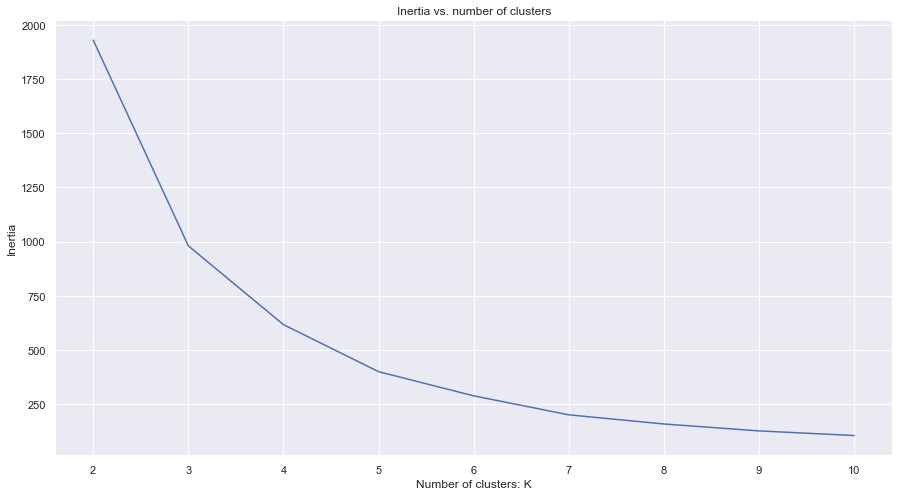

In [56]:

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()

In [57]:
stop

NameError: name 'stop' is not defined

get four clusters

In [62]:


cluster_cols = [ 'Bottle_Retail_scaled' ]


model = KMeans(n_clusters=3, random_state=42)

model.fit(products2[cluster_cols])

products2['product_cluster'] = model.predict(products2[cluster_cols])

In [63]:
products2.head()

,Item_Number,Item_Description,Bottle_Volume,Bottle_Retail,Bottles_Sold,Num_Stores_Selling,revenue,Category,Category_Name,New_Category_Name,Bottle_Volume_scaled,Bottle_Retail_scaled,Bottles_Sold_scaled,product_cluster
1,10006,Scoresby Rare Scotch,750,7.70,4619,197,35566.30,1012200,Scotch Whiskies,Scotch,-0.176797,-0.648276,-0.079924,0
2,100077,Kraken Rum w/ Tiki Glass,750,15.68,2679,136,42006.72,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.176797,-0.400847,-0.158226,0
3,10008,Scoresby Rare Scotch,1750,15.75,12340,287,194355.00,1012200,Scotch Whiskies,Scotch,2.456034,-0.398676,0.231710,0
4,10009,Scoresby Rare Scotch,1000,10.11,1722,70,17409.42,1012200,Scotch Whiskies,Scotch,0.481411,-0.573551,-0.196852,0
5,100148,Jack Daniels Single Barrel w/Snifter Glass,750,41.39,606,120,25082.34,1701100,Temporary & Specialty Packages,Temporary & Specialty Packages,-0.176797,0.396324,-0.241896,1


In [60]:
products2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4304 entries, 1 to 4474
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Number           4304 non-null   object 
 1   Item_Description      4304 non-null   object 
 2   Bottle_Volume         4304 non-null   int64  
 3   Bottle_Retail         4304 non-null   float64
 4   Bottles_Sold          4304 non-null   int32  
 5   Num_Stores_Selling    4304 non-null   int32  
 6   revenue               4304 non-null   float64
 7   Category              4304 non-null   object 
 8   Category_Name         4304 non-null   object 
 9   New_Category_Name     4304 non-null   object 
 10  Bottle_Volume_scaled  4304 non-null   float64
 11  Bottle_Retail_scaled  4304 non-null   float64
 12  Bottles_Sold_scaled   4304 non-null   float64
 13  product_cluster       4304 non-null   int32  
dtypes: float64(5), int32(3), int64(1), object(5)
memory usage: 453.9+ KB


In [64]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Item_Number,revenue,Bottle_Volume,Bottle_Retail,Bottles_Sold
product_cluster,,,,,
0,3304,3.629301e+08,814.720206,16.981832,8283.280097
1,915,4.649078e+07,833.409389,55.405826,1100.814410
2,82,1.757619e+06,733.536585,197.986551,122.390244


In [ ]:
products2['Bottle_Volume_liters'] = products2.Bottle_Volume / 1000

# Name Clusters

In [ ]:
prod_dict = {0:'Volume_For_Dollar', 1:'Everything_Else', 2:'Popular_Bottles',3:'High_End'}


In [ ]:
products2[['product_cluster']].apply(lambda p: prod_dict[p[0]],axis=1)

Name Product Clusters

In [ ]:
products2['cluster_name'] = products2['product_cluster'].apply(lambda p: prod_dict[p])

In [ ]:
products2.cluster_name

In [ ]:
products2.info()

In [72]:
products2['price_per_ml'] =products2.Bottle_Retail/products2.Bottle_Volume

In [66]:
pd.set_option('display.max_columns', None)
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' : 'mean', 'Bottle_Retail':'mean','Bottles_Sold':'mean' })

,Item_Number,revenue,Bottle_Volume,Bottle_Retail,Bottles_Sold
product_cluster,,,,,
0,3304,3.629301e+08,814.720206,16.981832,8283.280097
1,915,4.649078e+07,833.409389,55.405826,1100.814410
2,82,1.757619e+06,733.536585,197.986551,122.390244


In [73]:
pd.set_option('display.max_columns', None)
products2.groupby(['product_cluster']).agg({'Bottle_Volume' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

Bottle_Volume                   Bottle_Retail              \
                          min   max        mean           min         max   
product_cluster                                                             
0                          20  1800  814.720206        0.9900   36.171141   
1                         200  2400  833.409389       36.2600  124.500000   
2                         100  1750  733.536585      126.8225  495.750000   

                            price_per_ml                               \
                       mean          min      max       std    median   
product_cluster                                                         
0                 16.981832     0.003200  0.71250  0.033824  0.021368   
1                 55.405826     0.021000  0.52425  0.031538  0.063453   
2                197.986551     0.128566  1.50000  0.186571  0.242580   

                          Bottles_Sold                       
                     mean          min     max         mean  
product_cluster                                              
0                0.029342            1  563260  8283.280097  
1                0.071118            1  144787  1100.814410  
2                0.299459            1    2319   122.390244

In [ ]:
# stop

In [ ]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['product_cluster']).agg({'Bottle_Volume_liters' :['min','max', 'mean'], 'Bottle_Retail':['min','max', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max', 'mean'] })

In [ ]:
products2['price_per_ml'] = products2['Bottle_Retail'] / products2['Bottle_Volume']

In [74]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','Bottle_Volume':'nunique','revenue':'sum','price_per_ml':['min','max','std', 'median', 'mean']})

Item_Number Bottle_Volume       revenue price_per_ml           \
                    nunique       nunique           sum          min      max   
product_cluster                                                                 
0                      3304            16  3.629301e+08     0.003200  0.71250   
1                       915            14  4.649078e+07     0.021000  0.52425   
2                        82             5  1.757619e+06     0.128566  1.50000   

                                               
                      std    median      mean  
product_cluster                                
0                0.033824  0.021368  0.029342  
1                0.031538  0.063453  0.071118  
2                0.186571  0.242580  0.299459

In [ ]:
products2.groupby(['product_cluster']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

In [ ]:
# stop


In [ ]:
products2.groupby(['cluster_name']).agg({'Item_Number':'nunique','revenue':'sum','Bottle_Volume' :['min','max','std', 'median', 'mean'], 'Bottle_Retail':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'] })

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'Everything_Else'],'New_Category_Name')
    

In [ ]:
products2.loc[products2.cluster_name == 'Everything_Else']['New_Category_Name'].value_counts()/3648*100

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'High_End'],'New_Category_Name')
products2.loc[products2.cluster_name == 'High_End']['New_Category_Name'].value_counts()/157*100

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'Popular_Bottles'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Popular_Bottles']['New_Category_Name'].value_counts()/42*100

In [ ]:
# proc_freq(products2.loc[products2.cluster_name == 'Volume_For_Dollar'],'New_Category_Name')
products2.loc[products2.cluster_name == 'Volume_For_Dollar']['New_Category_Name'].value_counts()/454

In [ ]:
proc_freq(products2,'cluster_name')

In [ ]:
products2.groupby(['cluster_name']).agg({'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.groupby(['cluster_name']).agg({'revenue':['sum'],'Bottle_Volume':['nunique','min','max','median'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
pd.set_option('display.max_columns', None)
products2.groupby(['cluster_name']).agg({'Item_Number':['nunique'],'revenue':['sum'],'Bottle_Volume':['count','nunique','min','max','median','std'],'Bottle_Retail':['min','max','std', 'median', 'mean'],'price_per_ml':['min','max','std', 'median', 'mean'],'Bottles_Sold':['min','max','std', 'median', 'mean'],'Num_Stores_Selling':['min','max','std', 'median', 'mean'] })

In [ ]:
products2.cluster_name.value_counts()

In [ ]:
# df.sort_values(by=['Population'], ascending=False)
products2.sort_values(by=['revenue'], ascending=False)
products2[['cluster_name','revenue','Item_Description','Bottle_Retail','Bottle_Volume']].sort_values(by=['revenue'], ascending=False)
# products2.style.format("{:.0f}")


In [ ]:
products2.loc[products2.product_cluster==3,:]['Bottle_Retail'].max()

In [ ]:
# products2.loc[products2.product_cluster==1,:]

In [ ]:
products_out=products2[['Item_Number','Item_Description','Bottle_Volume','Bottle_Retail', 'Bottles_Sold','cluster_name','revenue','Num_Stores_Selling','New_Category_Name']]

In [ ]:
products['revenue'].sum()

In [ ]:
check

In [ ]:
# products_out.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\product_clusters.csv')